## Dyadic DWT (Discrete Wavelet Transform)<a id='DWT'></a>

Key features:

1. **High spectral compaction**, specially when transient signals are present.
2. **Multiresolution representation**: it is easy to recover a reduced version of the original image if only a sub-set of the coeﬃcients is proccesed.

### Filters bank implementation

<img src="data/QMF.svg">

Where:
\begin{equation}
  s = (\uparrow^2(L)*{\text s}_L) + (\uparrow^2(H)*{\text s}_H)
\end{equation}
and
\begin{equation}
  \begin{array}{rcl}
    L & = & \downarrow^2(s*{\text a}_L) \\
    H & = & \downarrow^2(s*{\text a}_H).
  \end{array}
\end{equation}


Comments:

1. ${\text a}_L$ and ${\text a}_H$ are the transfer function (the transfer function of a filter is the response of that filter to the unitary impulse function (Dirac's delta))  of a low-pass filter and high-pass filter, respectively, that have been designed to be complementary (ideally, in $L$ we only found the frequencies of $s$ that are not in $H$, and viceversa). When this is true, it is said the we are using a perfect-reconstruction quadrature-mirror filter-bank and the DWT is *biorthogonal*.

2. In the wavelet theory, ${\text s}_L$ is named the *scale function* and ${\text s}_H$ the *mother function* or *wavelet basis function*. The coefficients of $L$ are also knwon as the *scale coeffients* and the coeffcientes of $H$ the *wavelet coefficients* [[Sovic & Sersic, 2012]](https://scholar.google.es/scholar?hl=en&as_sdt=0%2C5&q=Ana+Sovic+and+Damir+Sersic.+Signal+decomposition+methods+for+reducind+drawbacks+of+the+dwt&btnG=).

3. $\downarrow^2(\cdot)$ and $\uparrow^2(\cdot)$ donote the
  subsampling and oversampling operations:
  
  \begin{equation}
    (\downarrow^2(s))_i = s_{2i}
  \end{equation}
  
  and
  
  \begin{equation}
    (\uparrow^2(s))_i =
  \left\{
  \begin{array}{ll}
    s_{i/2} & \text{if $i$ if even} \\
    0 & \text{otherwise}.
  \end{array}
  \right.
  \end{equation}
  
  where $s_i$ if the $i$-th sample of $s$.
  
4. $*$ is the convolution operator.

5. Notice that half of the filtered samples are wasted.

### Lifting implementation [[Sweldens & Schröder, 2000)]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=building+wavelets+at+home&btnG=)

<img src="data/lifting.svg">

Comments:

1.
\begin{equation}
  H_i = s_{2i+1} - {\cal P}(\{s_{2i}\})_i
  \tag{PredictionStep}
  \label{eq:PredictionStep}
\end{equation}

\begin{equation}
  L_i = s_{2i} + \{{\cal U}(H)\}_i
  \tag{UpdateStep}
  \label{eq:UpdateStep}
\end{equation}

2. Subsampled signals $\{s_{2i}\}$ and $\{s_{2i+1}\}$ can been computed by using

\begin{equation*}
   \{s_{2i+1}\} = \downarrow^2(Z^{-1}(s))
\end{equation*}

and

\begin{equation*}
   \{s_{2i}\} = \downarrow^2(s),
\end{equation*}

where $Z^{-1}$ represents the one sample delay function.

3. $H$ has tipically less energy and variance and entropy than $\{s_{2i+1}\}$.
4. $L$ has less aliasing than $\{s_{2i}\}$ (notice that $L$ has not
  been low-pass filtered before subsampling it).

### $T$-levels 1D-DWT

<img src="data/n_levels_dwt1d.svg">

### 2D-DWT

* The one-dimensional (1D) DWT is a separable transform. Therefore, the 2D DWT can be computed applying the DWT to all the rows of an image and next, to all the columns, or viceversa.

<img src="data/2D-DWT.svg">

* The contribution of a coefficient of a subband $b$ is determined by the DWT basis fuction ${s_H}^b$ asociated to that coefficient, which can be empirically determined by applying the inverse DWT to the Dirac Impulse function localized in that coefficient (notice that ${s_H}^b$ does not depend on the coefficient because we are supposing that all the coefficients of a subband have the same contribution, the same basis fuction) [[Rabbani, Joshi & Jones, 2009]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=Majid+Rabban%2C+Rajan+L.+Joshi%2C+and+Paul+W.+Jones.+The+JPEG+2000+Suite%2C+chapter+JPEG+2000+Core+Coding+System+%28Part+1%29.+WILEY%2C+2009&btnG=). Therefore, the  <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm">L$_2$-norm</a> for the subband $b$ is computed as the energy of a basis function of that subband as

\begin{equation}
  E({{\text s}_H}^b) = \sum_i{|{{\text s}_H}^b_i|}^2.
\end{equation}

In the case of the 5/3-DWT, the L$_2$-norms of the DWT subbands are:

<img src="data/factores_5_3_L2_norm.svg">

### Haar filters [[Haar, 1910]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=A.+Haar.+Zur+Theorie+der+orthogolanen+Funktionen-Systeme.+Mathematische+Annalen%2C+69%3A331%E2%80%93371%2C+1910&btnG=)

The $i$-th sample of the low-frequency subband is computed (using a filter plus subsampling) as

\begin{equation}
  L_i=\frac{s_{2i}+s_{2i+1}}{2},
  \tag{HaarL}
  \label{eq:Haar_A-LPF}
\end{equation}

and the $i$-th sample of the high-frequency subband as

\begin{equation}
  H_i=s_{2i+1}-s_{2i}.
  \tag{HaarH}
  \label{eq:Haar_A-HPF}
\end{equation}

If Lifting is used,

\begin{equation}
  L_i=s_{2i}+\frac{H_i}{2}.
  \tag{HaarLLifted}
  \label{eq:Haar_A-LPF-lifting}
\end{equation}

Notice that $H_i=0$ if $s_{2i+1}=s_{2i}$, therefore, the Haar transform is good to encode constant signals. The notation X/Y indicates the length (taps or number of coefficients) of the low-pass and the high-pass (convolution) filters of the filter bank implementation (not Lifting), respectively.

#### 2D basis functions

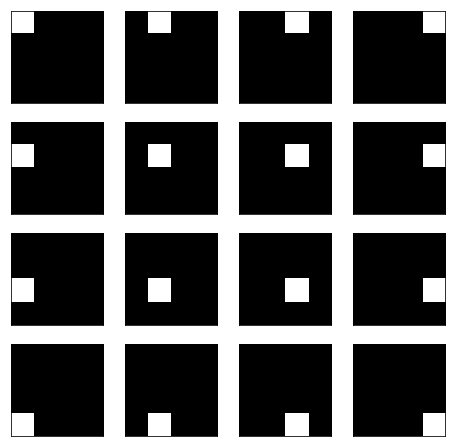

In [40]:
# pip install pywavelets
import pywt
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        # http://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2
        #coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, mode='per', level=3)
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[0][i, j] = 1.0 # Subband LL4
        # http://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-reconstruction-using-waverec2
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

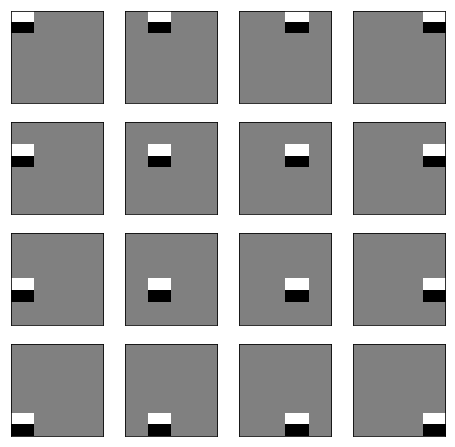

In [41]:
# pip install pywavelets
import pywt
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][0][i, j] = 1.0 # Subband LH4
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

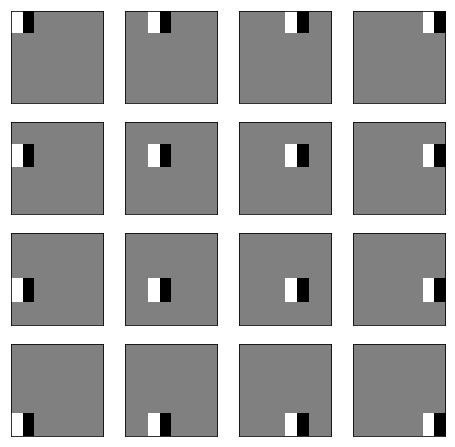

In [42]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][1][i, j] = 1.0 # Subband HL4
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255

        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

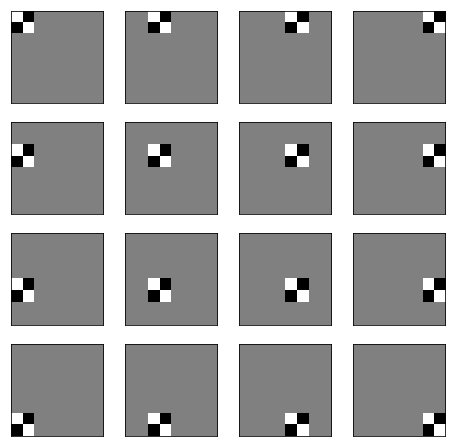

In [43]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][2][i, j] = 1.0 # Subband HH4
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

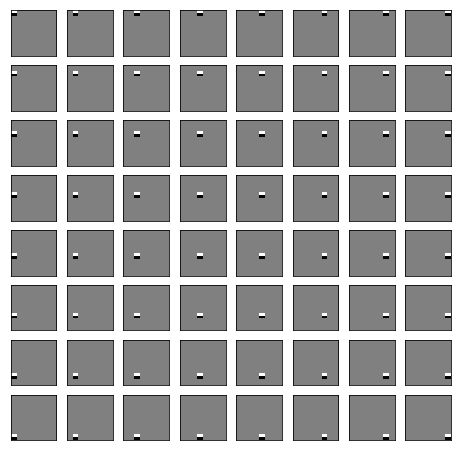

In [44]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(8):
    for j in range(8):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[2][0][i, j] = 1.0 # Subband HL3
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(16, 16, 16*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

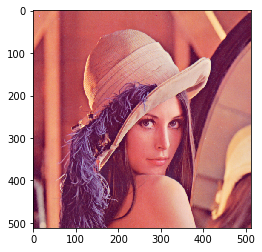

In [45]:
# Load lena

import urllib.request
from matplotlib import pyplot as plt
import numpy as np
import cv2 # pip install opencv-python

%matplotlib inline
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BRG = cv2.imdecode(arr,-1)
pixels = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)
plt.imshow(pixels)

In [46]:
# Color 2D-DWT is the 2D-DWT of each component
components = ('r','g','b')
coeffs = [None]*3
wavelet_= 'haar'
levels_ = 5
for i,com in enumerate(components):
    print("{} ".format(i), end='')
    coeffs[i] = pywt.wavedec2(pixels[:,:,i], wavelet=wavelet_, level=levels_)

0 1 2 

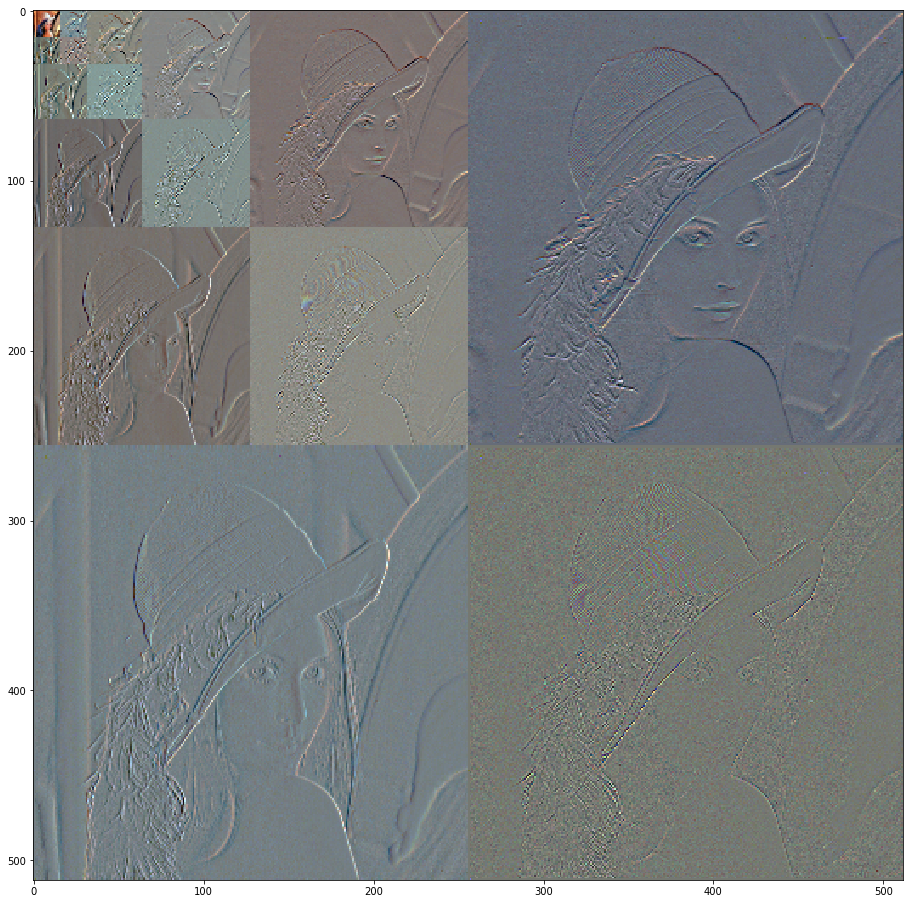

In [47]:
# View DWT coefs

fig = plt.figure(figsize=(16, 16))

view = np.empty(pixels.shape, 'uint8')

# LL subband
for i,com in enumerate(components):
    x = coeffs[i][0][:,:]
    y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
    view[0:coeffs[i][0].shape[0],
         0:coeffs[i][0].shape[1],
         i] = y

for l in range(levels_):

    # LH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][0][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[0:coeffs[i][l+1][0].shape[0],
             coeffs[i][l+1][0].shape[1]:coeffs[i][l+1][0].shape[1]*2,
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][1][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][1].shape[0]:coeffs[i][l+1][1].shape[0]*2,
             0:coeffs[i][l+1][1].shape[1],
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][2][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][2].shape[0]:coeffs[i][l+1][2].shape[0]*2,
             coeffs[i][l+1][2].shape[1]:coeffs[i][l+1][2].shape[1]*2,
             i] = y

plt.subplot(1, 1, 1)
plt.imshow(view)

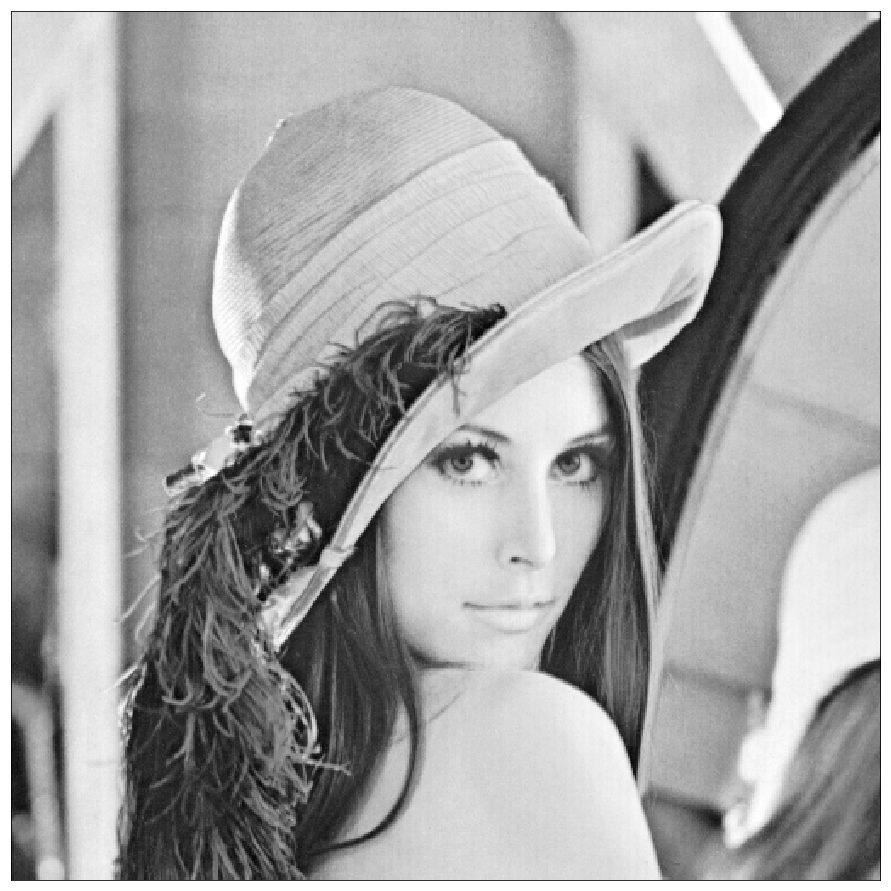

In [48]:
recons_ = pywt.waverec2(coeffs[0], wavelet=wavelet_)
max = recons_.max()
min = recons_.min()
if(max!=min):
    recons = (recons_-min)/(max-min)*255

# Visualize
fig = plt.figure(figsize=(16, 16))

plt.imshow(recons, cmap=plt.cm.gray)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

255 0


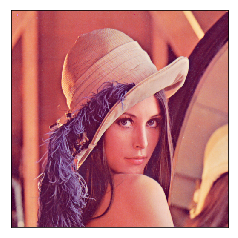

In [49]:
recons = np.empty(pixels.shape)

recons[:,:,0] = pywt.waverec2(coeffs[0], wavelet=wavelet_)
recons[:,:,1] = pywt.waverec2(coeffs[1], wavelet=wavelet_)
recons[:,:,2] = pywt.waverec2(coeffs[2], wavelet=wavelet_)
max = recons.max()
min = recons.min()
if(max!=min):
    recons = ((recons-min)/(max-min)*255).astype('uint8')
                      
# Visualize
print(recons.max(), recons.min())
plt.imshow(recons)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

### Progressive transmission

100 coefficients

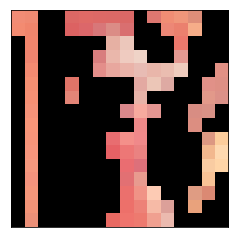

200 coefficients

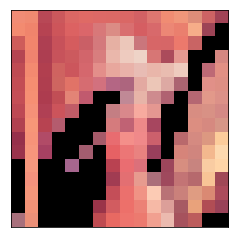

300 coefficients

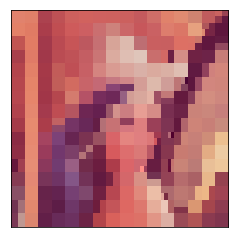

400 coefficients

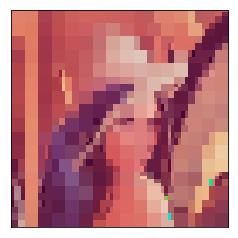

500 coefficients

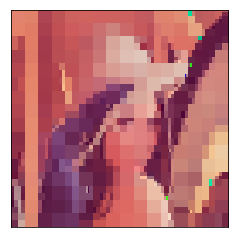

600 coefficients

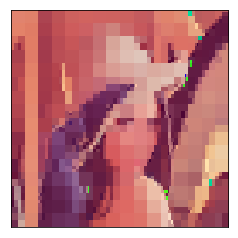

700 coefficients

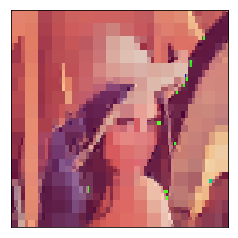

800 coefficients

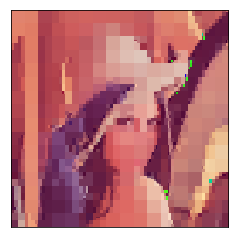

900 coefficients

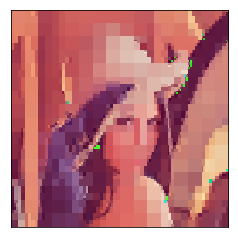

1000 coefficients

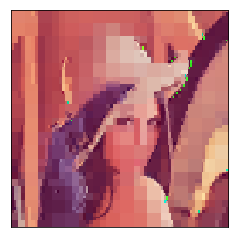

In [50]:
# Reconstruct with biggest DWT coefs
recons = np.empty(pixels.shape)

N = 100 # Step size (in coeffs) for each reconstruction
for k in range(10): # Up to 32 reconstructions

    coeffs_indexes = np.empty((pixels.shape[0] * pixels.shape[1]),
                            dtype='float, int, int, int, int')
                            # Coeff, level, subband, coor_x, coor_y

    # Process only the R component to find the higher coeffs
    
    offset = 0
    
    # LL
    for x in range(coeffs[0][0].shape[0]):
        for y in range(coeffs[0][0].shape[1]):
            coeffs_indexes[offset] = (np.abs(coeffs[0][0][x][y]), 0, 0, x, y)
            offset += 1
    
    # Rest of subbands
    for l in range(levels_):
        for s in range(3):
            for x in range(coeffs[0][l+1][s].shape[0]):
                for y in range(coeffs[0][l+1][s].shape[1]):
                    coeffs_indexes[offset] = (np.abs(coeffs[0][l+1][s][x][y]), (l+1), s, x, y)
                    offset += 1

    sorted = np.zeros((pixels.shape[0] * pixels.shape[1]), dtype='float, int, int, int, int')
    sorted = np.sort(coeffs_indexes)[::-1]

    # Reconstruct R

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_)

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][0][sorted[kk][3], sorted[kk][4]]
        else:
            #print(kk, sorted[kk][1], sorted[kk][2], sorted[kk][3], sorted[kk][4])
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_)
    recons[:,:,0] = recons_

    # Reconstruct G

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_)

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_)
    recons[:,:,1] = recons_
    
    # Reconstruct B

    # An "empty" transformed structure
    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_)

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]

    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_)
    recons[:,:,2] = recons_
                      
    max = recons.max()
    min = recons.min()
    if(max!=min):
        recons = ((recons-min)/(max-min)*255).astype('uint8')

    # Visualize
    plt.imshow(recons)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    print("{} coefficients".format((k+1)*N), end='')
    plt.show()

### 5/3 (linear) filters [[Sweldens & Schröder, 2000]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=building+wavelets+at+home&btnG==)

The $i$-th sample of the low-frequency subband (using a filter-bank implementation) is

\begin{equation}
  L_i=-\frac{1}{8}s_{2i-2}+\frac{1}{4}s_{2i-1}+\frac{3}{4}s_{2i}
  +\frac{1}{4}s_{2i+1}-\frac{1}{8}s_{2i+2}
  \tag{5/3L}
  \label{eq:Lineal_A-LPF}
\end{equation}

and the $i$-th sample of the high-frequency signal is computed by

\begin{equation}
  H_i=s_{2i+1}-\frac{s_{2i}+s_{2i+2}}{2},
  \tag{5/3H}
  \label{eq:Lineal_A-HPF}
\end{equation}

that, if we use Lifting, it can be also computed using less operations by

\begin{equation}
  L_i=s_{2i}+\frac{H_{i-1}+H_i}{4}.
  \tag{5/3LLifted}
  \label{eq:Lineal_A-LPF_lifting}
\end{equation}

Notice that $H_i=0$ if $s_{2i+1}=(s_{2i}+s_{2i+2})/2$. Therefore, the 5/3 transform is suitable to encode lineally piece-wised signals.

#### 2D basis functions

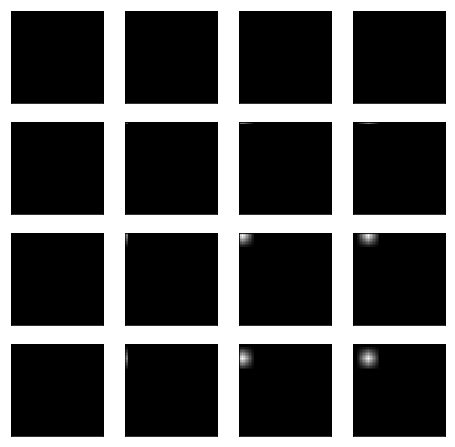

In [1]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'bior2.2'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        #coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, mode='per', level=3)
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        #print(coeffs[0].shape)
        coeffs[0][i, j] = 1.0
#for i in range(len(coeffs)-1):
    #print(i)
    #coeffs[i+1][0][1, 1] = 1.0
    #coeffs[i+1][1][1, 1] = 1.0
    #coeffs[i+1][2][1, 1] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);
#plt.subplot(1, 1, 1)
#plt.imshow(recons, cmap='gray')

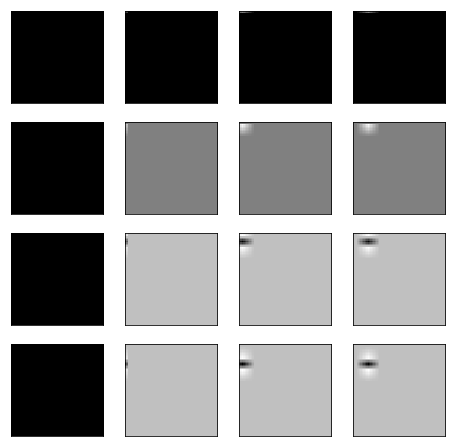

In [71]:
fig = plt.figure(figsize=(16, 16))

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][0][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

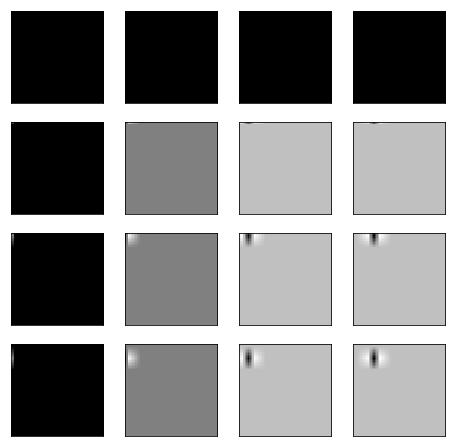

In [72]:
fig = plt.figure(figsize=(16, 16))

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][1][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

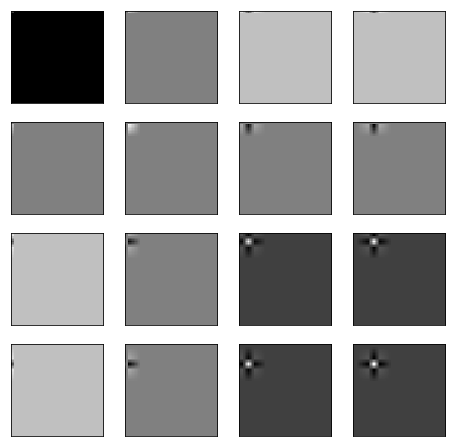

In [73]:
fig = plt.figure(figsize=(16, 16))

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][2][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

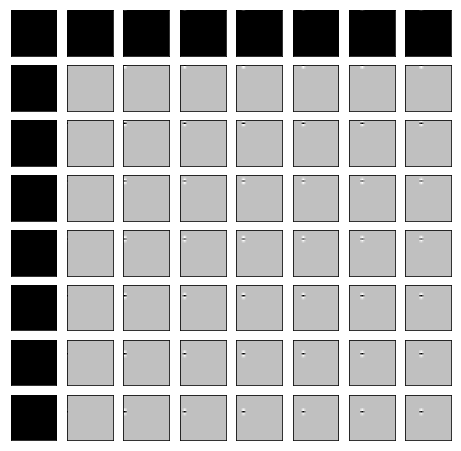

In [74]:
fig = plt.figure(figsize=(16, 16))

for i in range(8):
    for j in range(8):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[2][0][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(16, 16, 16*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

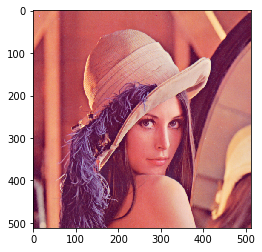

In [75]:
# Load lena

import urllib.request
from matplotlib import pyplot as plt
import numpy as np
import cv2 # pip install opencv-python

%matplotlib inline
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BRG = cv2.imdecode(arr,-1)
pixels = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)
plt.imshow(pixels)

In [76]:
# Color 2D-DWT is the 2D-DWT of each component
components = ('r','g','b')
coeffs = [None]*3
wavelet_= 'bior2.2'
levels_ = 5
for i,com in enumerate(components):
    print("{} ".format(i), end='')
    coeffs[i] = pywt.wavedec2(pixels[:,:,i], wavelet=wavelet_, level=levels_, mode='per')

0 1 2 

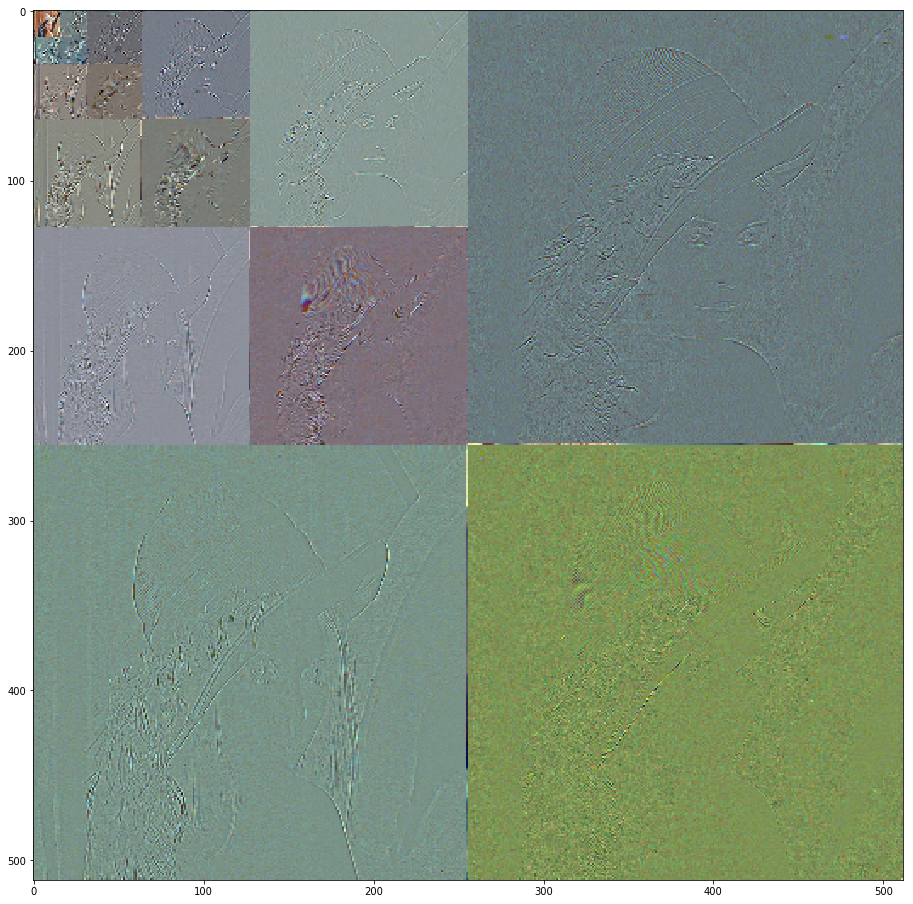

In [77]:
# View DWT coefs

fig = plt.figure(figsize=(16, 16))

view = np.empty(pixels.shape, 'uint8')

# LL subband
for i,com in enumerate(components):
    x = coeffs[i][0][:,:]
    y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
    view[0:coeffs[i][0].shape[0],
         0:coeffs[i][0].shape[1],
         i] = y

for l in range(levels_):

    # LH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][0][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[0:coeffs[i][l+1][0].shape[0],
             coeffs[i][l+1][0].shape[1]:coeffs[i][l+1][0].shape[1]*2,
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][1][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][1].shape[0]:coeffs[i][l+1][1].shape[0]*2,
             0:coeffs[i][l+1][1].shape[1],
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][2][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][2].shape[0]:coeffs[i][l+1][2].shape[0]*2,
             coeffs[i][l+1][2].shape[1]:coeffs[i][l+1][2].shape[1]*2,
             i] = y

plt.subplot(1, 1, 1)
plt.imshow(view)

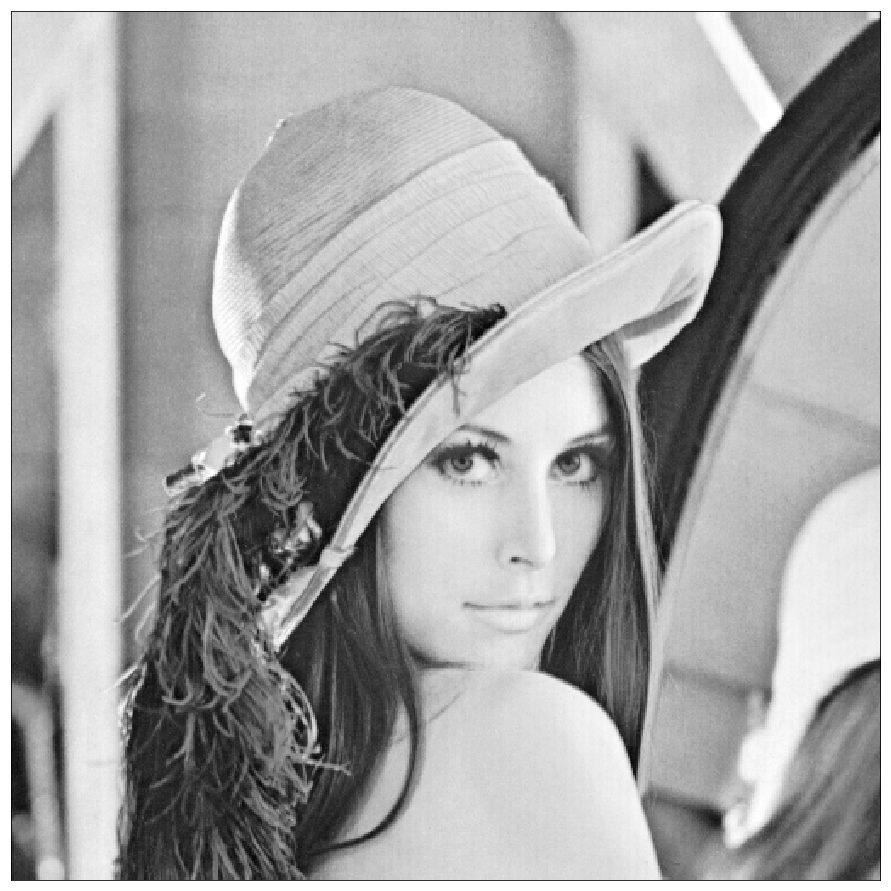

In [78]:
recons_ = pywt.waverec2(coeffs[0], wavelet=wavelet_, mode='per')
max = recons_.max()
min = recons_.min()
if(max!=min):
    recons = (recons_-min)/(max-min)*255

# Visualize
fig = plt.figure(figsize=(16, 16))

plt.imshow(recons, cmap=plt.cm.gray)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

255 0


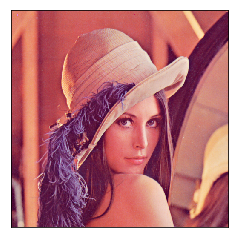

In [79]:
recons = np.empty(pixels.shape)

recons[:,:,0] = pywt.waverec2(coeffs[0], wavelet=wavelet_, mode='per')
recons[:,:,1] = pywt.waverec2(coeffs[1], wavelet=wavelet_, mode='per')
recons[:,:,2] = pywt.waverec2(coeffs[2], wavelet=wavelet_, mode='per')
max = recons.max()
min = recons.min()
if(max!=min):
    recons = ((recons-min)/(max-min)*255).astype('uint8')
                      
# Visualize
print(recons.max(), recons.min())
plt.imshow(recons)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

### Progressive transmission

100 coefficients

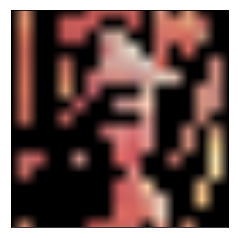

200 coefficients

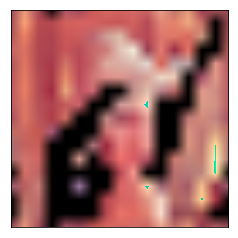

300 coefficients

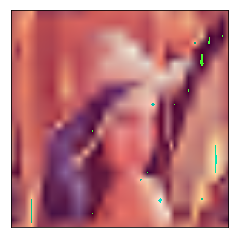

400 coefficients

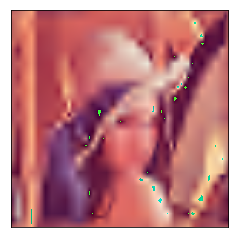

500 coefficients

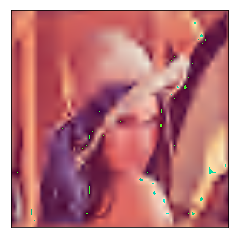

600 coefficients

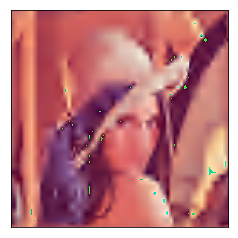

700 coefficients

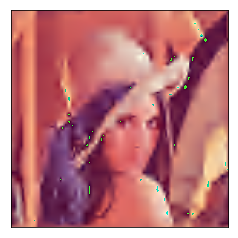

800 coefficients

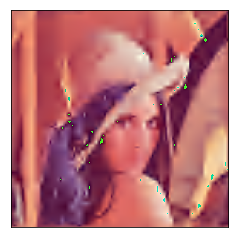

900 coefficients

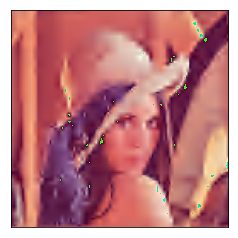

1000 coefficients

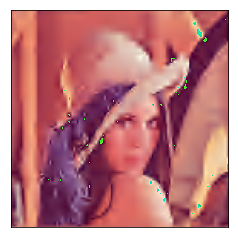

In [80]:
# Reconstruct with biggest DWT coefs
recons = np.empty(pixels.shape)

N = 100 # Step size (in coeffs) for each reconstruction
for k in range(10): # Up to 32 reconstructions

    coeffs_indexes = np.empty((pixels.shape[0] * pixels.shape[1]),
                            dtype='float, int, int, int, int')
                            # Coeff, level, subband, coor_x, coor_y

    # Process only the R component to find the higher coeffs
    
    offset = 0
    
    # LL
    for x in range(coeffs[0][0].shape[0]):
        for y in range(coeffs[0][0].shape[1]):
            coeffs_indexes[offset] = (np.abs(coeffs[0][0][x][y]), 0, 0, x, y)
            offset += 1
    
    # Rest of subbands
    for l in range(levels_):
        for s in range(3):
            for x in range(coeffs[0][l+1][s].shape[0]):
                for y in range(coeffs[0][l+1][s].shape[1]):
                    coeffs_indexes[offset] = (np.abs(coeffs[0][l+1][s][x][y]), (l+1), s, x, y)
                    offset += 1

    sorted = np.zeros((pixels.shape[0] * pixels.shape[1]), dtype='float, int, int, int, int')
    sorted = np.sort(coeffs_indexes)[::-1]

    # Reconstruct R

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_, mode='per')

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][0][sorted[kk][3], sorted[kk][4]]
        else:
            #print(kk, sorted[kk][1], sorted[kk][2], sorted[kk][3], sorted[kk][4])
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_, mode='per')
    recons[:,:,0] = recons_

    # Reconstruct G

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_, mode='per')

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_, mode='per')
    recons[:,:,1] = recons_
    
    # Reconstruct B

    # An "empty" transformed structure
    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_, mode='per')

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]

    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_, mode='per')
    recons[:,:,2] = recons_
                      
    max = recons.max()
    min = recons.min()
    if(max!=min):
        recons = ((recons-min)/(max-min)*255).astype('uint8')

    # Visualize
    plt.imshow(recons)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    print("{} coefficients".format((k+1)*N), end='')
    plt.show()

## Quantization in the transform domain

* If the transform is orthogonal, by definition coeffs $S[k]$ are uncorrelated. Therefore, a scalar quantizer can performs an optimal quantization.

## Bit-planes progression<a id='bitplanes_progression'></a>

In [ ]:
!make bit-plane-trans.svg

<img src="data/bit-plane-trans.svg" width=800>

## Bit allocation (bit-rate control)

* In lossless coding, coeffs $S_u$ are directly encoded using some text compression algorithm or a combination of them.

* However, in most situations, a lossy compression is needed and in this case, a transform coder must determine, given a maximum number of bits $\overline{R}$ (which is defined by the compression ratio selected by the user), the number of bits $R(u)$ used by the quantizer for each coeff $S_k$.

## Bit allocation based on minimizing the quantization error

* In unitary transforms, as a consequence of the energy preserving property, an uniform quantization (i.e. the dividing each coeff $S_u$ by the same quantization step) should provide optimal bit allocation if we want to minimize the quantization error (the distortion) in the recostructed signal $s$.

## Bit allocation based on minimizing the variance of the quantization error

* Lets assume that the variance of the coeffs, defined as

  \begin{equation}
    \sigma_{S_u}^2 = \text{E}\big( (S_u - \overline{S})^2\big)
   \end{equation}
   
   (where
   
   \begin{equation}
     \overline{S} = \text{E}(S) = \frac{1}{B}\sum_{u=0}^{B-1} S_u
   \end{equation}
   
  corresponds to the amount of information provided by each coeff. Therefore, coeffs with high variance should be assigned more bits and viceversa.

* Lets define

  <a id='target_bit_average'></a>
  \begin{equation}
    {\overline{R}} = \frac{1}{B}\sum_{u=0}^{B-1}R(u)
    \tag{$\overline{R}$}
  \end{equation}
  
  as the (target) average number of bits/coeff, where $R(u)$ is the number of bits assigned to coeff $S_u$.

* If the mean square error is as a measure of distortion, the variance of the distortion generated by the quantization of a coeff $S_u$ [can be modeled](http://cdn.intechopen.com/pdfs/16267/InTech-Rate_control_in_video_coding.pdf) by

  \begin{equation}
    \sigma_{S_u-\tilde{S}_u}^2=\alpha_{u}2^{-2R(u)}\sigma_{S_u}^2,
  \end{equation}
  
  where $\alpha_{u}$ depends on the frequency $u$ and the quantizer. 

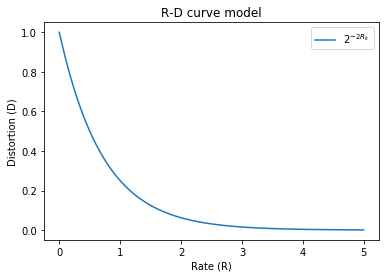

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 500)
plt.plot(x, 2**(-2*x), label=r'$2^{-2R_k}$')
plt.title('R-D curve model')
plt.xlabel('Rate (R)')
plt.ylabel('Distortion (D)')
plt.legend()

* Assuming an additive distorion metric, the total distortion variance for $R_k$ bits/coeff is given by

  \begin{equation}
    D = \sigma_{S-\tilde{S}}^2 = \sum_{u=0}^{B-1} \sigma_{S_u-\tilde{S}_u}^2 = \sum_{u=0}^{B-1}\alpha_u 2^{-2R(u)}\sigma_{S_u}^2 = \alpha\sum_{u=0}^{B-1}2^{-2R(u)}\sigma_{S_u}^2
    \tag{$D$}
  \end{equation},
  
  supposing that $\alpha_u = \alpha$ is constant for all coeffs (a valid supposition for unitary transforms because the quantization error generated in each coeff should be the same if an uniform quantizer is used).
  
* The objective of the bit-allocation process is to find the $\{R(u)\}_{u=0}^{B-1}$ so that minimize $D$ subject to constraint $\overline{R}$:

  \begin{equation}
    \underset{\{R(u)\}_{u=0}^{B-1}}{\operatorname{arg min}} D, \text{s.t.}~{\overline{R}}. 
  \end{equation}

* This is an optimization problem that can be solved using [Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier) (note: the following development is not the "standard" way of using Lagrenge multipliear, but it is equivalent).

* Lets define the Lagrangian functional

  \begin{equation}
    J = D - \lambda\Big( \overline{R} - \frac{1}{B}\sum_{u=0}^{B-1}R(u) \Big)= \alpha \sum_{u=0}^{B-1} 2^{-2R(u)}\sigma_{S_u}^2 - \lambda \Big( \overline{R} - \frac{1}{B}\sum_{u=0}^{B-1}R(u) \Big),
  \end{equation}
  
 which taking

  \begin{equation}
    \frac{\partial J}{\partial R(u)} = 0
  \end{equation}
  
 produces that
  
  \begin{equation}
    R(u) = \frac{1}{2}\log_2\big( 2\alpha\ln 2\sigma_{S_u}^2 \big) - \frac{1}{2}\log_2\lambda.
    \tag{$R(u)$}
  \end{equation}
  
* Substituting $R(u)$ in Eq. ($\overline{R}$), we get that

  \begin{equation}
    \overline{R} = \frac{1}{B}\sum_{u=0}^{B-1}\frac{1}{2}\log_2\big( 2\alpha\ln 2\sigma_{S_u}^2 \big) - \frac{1}{2}\log_2\lambda.
  \end{equation}
  
* Operating

  \begin{equation}
    \lambda = \prod_{u=0}^{B-1}\sqrt[B]{2\alpha\ln 2\sigma_{S_u}^2} - 2^{-2\overline{R}}.
  \end{equation}
  
* Substituting $\lambda$ in Eq. ($R(u)$), we obtain the optimal number of bits for each coeff

  \begin{equation}
    R(u) = \overline{R} + \frac{1}{2}\log_2\frac{\sigma_{S_u}^2}{\displaystyle\prod_{u=0}^{B-1}\sqrt[B]{\sigma_{S_u}^2}}.
  \end{equation}
  
  which minimizes the variance of the quantization error. Notice that this value depends proportionally on $\overline{R}$ (the target average bits/coeff), logaritmically on $\sigma_{S_u^2}$ (the variance of the coeff) and log-inversely on the geometric mean of the variances of all coeffs.

## Encoding

* For DCT, usually ZigZag-RLE followed by 0-order entropy coding.
* For DWT, tree coding or block-based coding.

## Code-stream orderings and scalabilities<a id='scalabilities'></a>

* The order in which the DWT coeﬃents are decoded determines the type of scalability (example with 2 qualities and 3 resolutions):

<img src="data/orderers-and-scalabilities.svg">

## Interesting links

+ http://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/
+ http://www.scipy-lectures.org/packages/scikit-image/
+ https://www.safaribooksonline.com/library/view/programming-computer-vision/9781449341916/ch01.html